In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [2]:
fs = 50. # Hz sampling frequency

def gaussian(x, a, b, c):
    return a * np.exp(-((x-b)**2) / (2 * c**2))

def generate_noisy_data():
    Tt = 2.    # s total sampling time
    t  = np.arange(0, Tt, 1 / fs)
    g1 = gaussian(t, 0.6, 0.5, 0.07)
    g2 = gaussian(t, 1.0, 1.2, 0.06)
    g3 = gaussian(t, 0.8, 1.6, 0.12)
    ideal = g1 + g2 + g3
    #plt.plot(t, ideal, 'r-', lw=4.)
    #plt.ylim(-1, 2.5)
    np.random.seed(1)
    noise = np.random.normal(0, 0.5, size=t.shape)
    data = ideal + noise
    return t, data, ideal

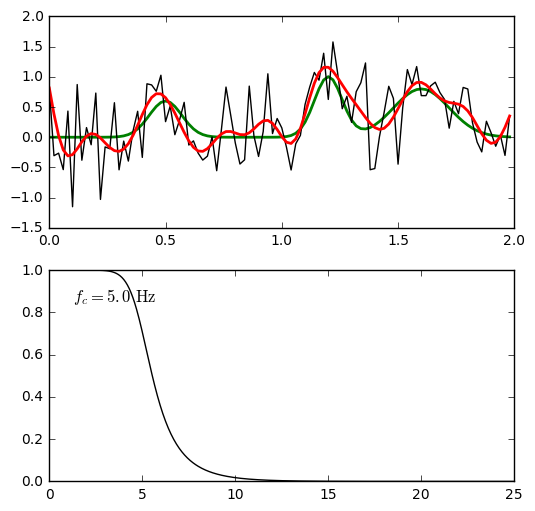

In [30]:
def plot_filt(LP, t, data, ideal):
    fig, ax = plt.subplots(2,1, figsize=(6,6))
    ax[0].plot(t, ideal, 'g-', lw=2.)
    ax[0].plot(t, data, 'k-', lw=1.)

    fdom = np.arange(t.size) * fs/(2 * np.pi)
    ax[1].set_xlim(0, fs/2.)
    ax[1].set_ylim(0, 1)
    
    fN = fs / 2.  # Nyquist frequency
    N = 5         # order of filter
    Wn = LP / fN
    b, a = signal.butter(N, Wn, 'low')
    smoothed = signal.filtfilt(b, a, data)
    w, h = signal.freqz(b, a)
    
    ax[0].plot(t, smoothed, 'r-', lw=2)
    ax[1].plot(w * fs/(2 * np.pi), np.abs(h), 'k-')
    ax[1].text(0.05, 0.85, '$f_c = %0.1f\ \mathrm{Hz}$' % (LP), transform=ax[1].transAxes, fontsize=12)
    
t, data, ideal = generate_noisy_data()
_ = interact(plot_filt, LP=(0,25), t=fixed(t), data=fixed(data), ideal=fixed(ideal))